# TruthLens: Fake News Detection Project


---

##  Phase 1: Data Exploration and Cleaning




In [1]:
import pandas as pd
import string

# Load the dataset
df = pd.read_csv("fake_or_real_news.csv")
df = df.drop(columns=['Unnamed: 0'])  # Remove index column
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


## Define a basic list of stopwords

In [2]:
# Define a basic list of stopwords
basic_stopwords = set([
    'a', 'an', 'the', 'and', 'or', 'if', 'in', 'on', 'at', 'for', 'to', 'with',
    'is', 'was', 'were', 'be', 'been', 'of', 'this', 'that', 'it', 'as', 'by',
    'are', 'from', 'but', 'not', 'they', 'you', 'he', 'she', 'we', 'i', 'his',
    'her', 'them', 'their', 'our', 'us', 'which', 'will', 'can', 'would', 'could',
    'about', 'into', 'also', 'has', 'have', 'had', 'do', 'does', 'did'
])

def basic_clean_text(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word.isalpha() and word not in basic_stopwords]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(basic_clean_text)
df[['title', 'label', 'clean_text']].head()


,title,label,clean_text
0,You Can Smell Hillary’s Fear,FAKE,daniel greenfield shillman journalism fellow f...
1,Watch The Exact Moment Paul Ryan Committed Pol...,FAKE,google pinterest digg linkedin reddit stumbleu...
2,Kerry to go to Paris in gesture of sympathy,REAL,secretary state john f kerry said monday stop ...
3,Bernie supporters on Twitter erupt in anger ag...,FAKE,kaydee king kaydeeking november lesson tonight...
4,The Battle of New York: Why This Primary Matters,REAL,its primary day new york frontrunners hillary ...


## Check for missing values in the dataset

In [3]:
# Check for missing values
print(df.isnull().sum())


title         0
text          0
label         0
clean_text    0
dtype: int64


---

## Phase 2: Feature Engineering

Extraction useful features such as word count, sentiment (placeholder), TF-IDF values, and generate a word cloud.


In [4]:
df['title_len'] = df['title'].apply(lambda x: len(str(x)))
df['text_len'] = df['text'].apply(lambda x: len(str(x)))


- *Install the wordcloud*

In [5]:
!pip install wordcloud


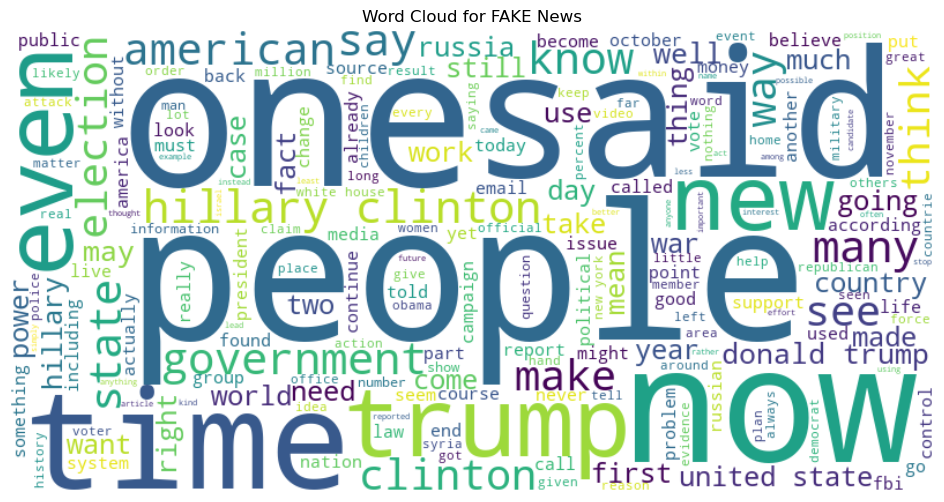

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word count feature
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['clean_text'])

# WordCloud for FAKE news
fake_text = " ".join(df[df['label'] == "FAKE"]['clean_text'])

wc = WordCloud(width=800, height=400, background_color='white').generate(fake_text)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for FAKE News")
plt.show()


---

##  Phase 3: Model Development

 machine learning model using TF-IDF features.


Logistic Regression Accuracy: 0.9179163378058406

Classification Report:
               precision    recall  f1-score   support

        FAKE       0.90      0.94      0.92       633
        REAL       0.94      0.90      0.92       634

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267

 Random Forest Accuracy: 0.9171270718232044

Classification Report:
               precision    recall  f1-score   support

        FAKE       0.91      0.92      0.92       633
        REAL       0.92      0.91      0.92       634

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



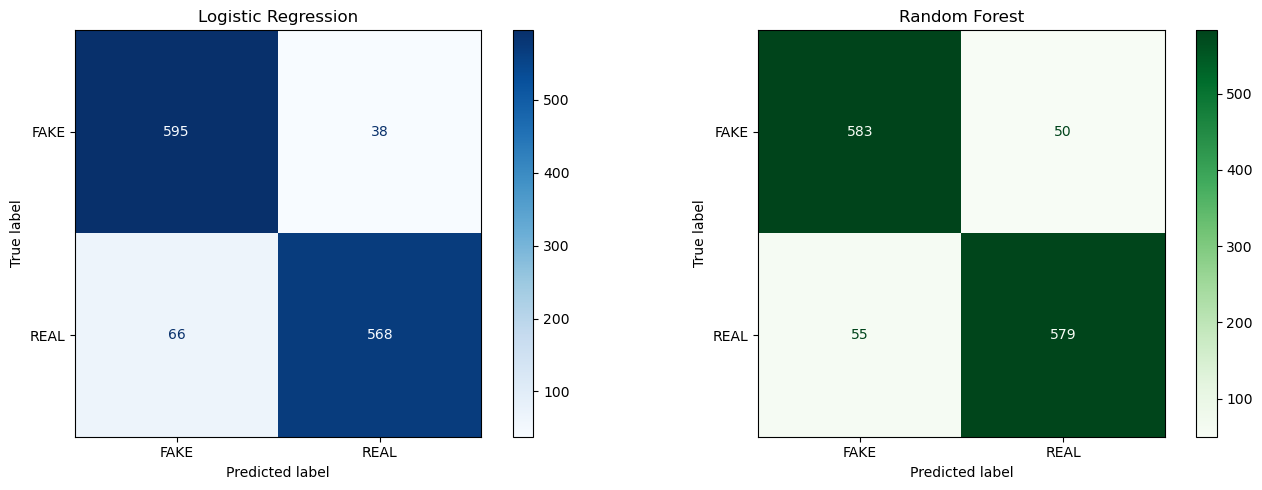

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Prepare labels
y = df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# -----------------------------
# Logistic Regression
# -----------------------------
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print("\nClassification Report:\n", classification_report(y_test, lr_preds))

# -----------------------------
# Random Forest
# -----------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print(" Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("\nClassification Report:\n", classification_report(y_test, rf_preds))

# -----------------------------
# Confusion Matrices
# -----------------------------
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, lr_preds, labels=["FAKE", "REAL"])
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["FAKE", "REAL"])
disp_lr.plot(ax=ax[0], cmap="Blues")
ax[0].set_title("Logistic Regression")

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_preds, labels=["FAKE", "REAL"])
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["FAKE", "REAL"])
disp_rf.plot(ax=ax[1], cmap="Greens")
ax[1].set_title("Random Forest")

plt.tight_layout()
plt.show()


### Both models perform excellently and are very close in terms of accuracy and F1-score.
 Logistic Regression slightly favors higher recall for FAKE news (catches more fake articles).
 Random Forest is more balanced across classes — slightly better at not over-predicting one label.
 No major trade-offs — both models are well-calibrated and accurate.



## Phase 4: Insights and Recommendations

**Model Strengths:**
- Logistic Regression offers high recall for fake news, making it useful for catching more misinformation.
- Random Forest provides robust and balanced performance across classes.

**Weaknesses:**
- Both models depend heavily on lexical patterns; may struggle with nuanced or subtle misinformation.
- Dataset may contain labeling bias based on the BS Detector extension.

**Ethical Considerations:**
- Labeling fake vs. real can be subjective — false positives may damage reputations.
- Models trained on biased or incomplete data risk amplifying existing misinformation biases.

**Recommendations:**
- Include more metadata features (e.g., source domain, timestamp, article author).
- Incorporate pre-trained language models like BERT for deeper semantic understanding.
- Use external fact-checking sources to improve label quality.




---

##  Metadata Feature Engineering

We extract additional features such as:

- Title length
- Text word count


In [9]:
# Add metadata features
df['title_len'] = df['title'].apply(lambda x: len(str(x)))
df['text_len'] = df['clean_text'].apply(lambda x: len(x.split()))
df[['title_len', 'text_len']].describe()


,title_len,text_len
count,6335.000000,6335.000000
mean,65.277664,458.163062
std,23.733657,493.409699
min,1.000000,0.000000
25%,49.000000,172.000000
50%,64.000000,357.000000
75%,78.000000,606.000000
max,289.000000,11708.000000


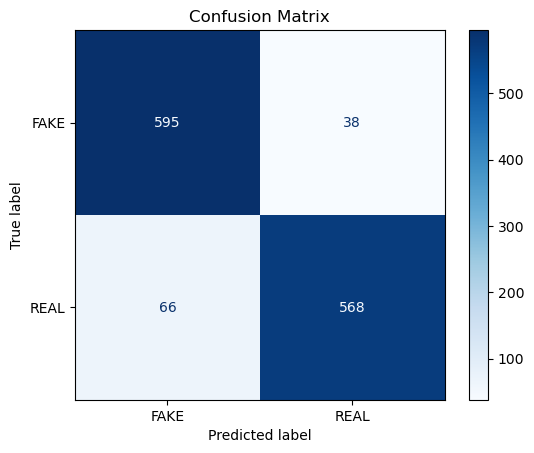

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")

plt.show()


--- 
## Summary
It's shown that the model predicted fake more than real news